In [1]:
# ==== Mount Google Drive ====
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 安装依赖
!pip install -q "flwr[simulation]" torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# Federated LSTM 30min → 30min

# ----  Set Project Root Directory ----
import os, sys
project_root = "/content/drive/MyDrive/elec_forecasting"
os.chdir(project_root)
sys.path.append(project_root)

# ---- Import modules ----
from utils.visualization import (
    save_sorted_r2_plot,
    save_sorted_mae_plot,
    save_sorted_rmse_plot
)


In [ ]:
# Step 1: 训练联邦模型
!python federated/run_simulation_lstm.py

2025-07-23 09:59:15.432325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753264755.705872    1299 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753264755.780408    1299 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-23 09:59:16.332304: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flw

In [3]:
# Step 2: 从评估日志中提取每户最佳轮次的指标
!python federated/generate_eval_metrics_best.py

✅ Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/federated_lstm/30min_30min/eval_metrics_best.csv


In [3]:
# Step 3: 对有权重的最佳模型进行图像和预测结果保存
!python federated/postprocess_best_round.py

2025-08-16 21:52:03.448581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755381123.476097    4021 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755381123.484622    4021 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755381123.510782    4021 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755381123.510835    4021 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755381123.510840    4021 computation_placer.cc:177] computation placer alr

R² comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/federated_lstm/30min_30min/plot_predictions/r2_sorted_plot.png


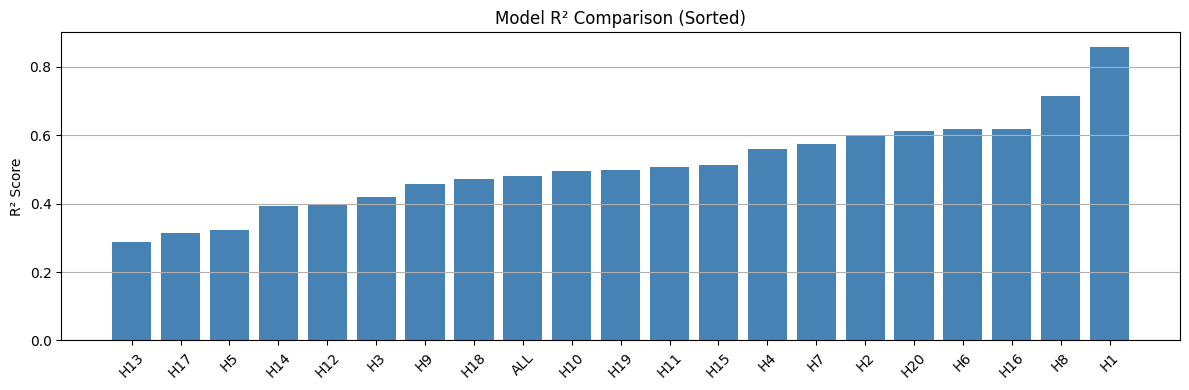

MAE comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/federated_lstm/30min_30min/plot_predictions/mae_sorted_plot.png


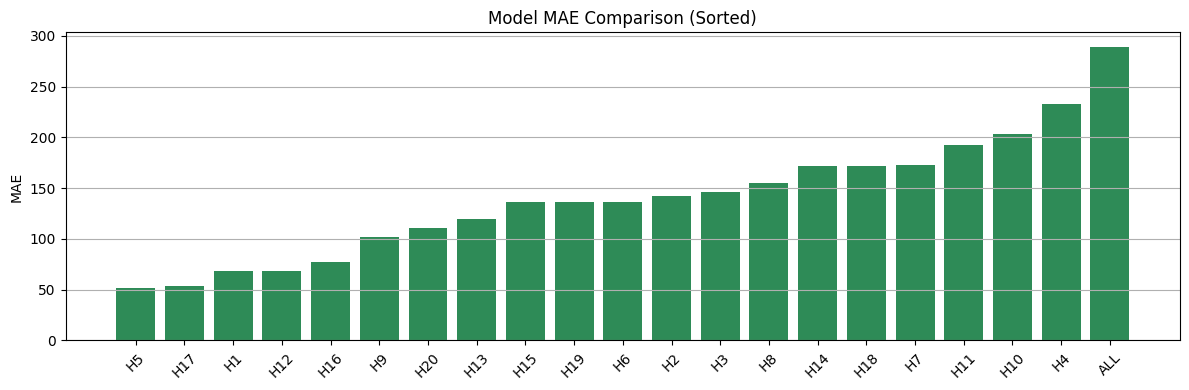

排序图已保存至： /content/drive/MyDrive/elec_forecasting/experiments/federated_lstm/30min_30min/plot_predictions


In [4]:
# ==== Plot sorted R² / MAE / RMSE bar charts ====
import os

# 路径设置
target_name = "30min_30min"
project_root = "/content/drive/MyDrive/elec_forecasting"
eval_csv_path = os.path.join(project_root, "experiments", "federated_lstm", target_name, "eval_metrics_best.csv")
plot_dir = os.path.join(project_root, "experiments", "federated_lstm", target_name, "plot_predictions")
os.makedirs(plot_dir, exist_ok=True)

# 绘图并保存
save_sorted_r2_plot(eval_csv_path, save_path=os.path.join(plot_dir, "r2_sorted_plot.png"))
save_sorted_mae_plot(eval_csv_path, save_path=os.path.join(plot_dir, "mae_sorted_plot.png"))

print("排序图已保存至：", plot_dir)
